This script is used to generate various statistics from the entropy maps for all lcmaps

In [1]:
%pylab inline

import ee
import geemap

# import the cartoee functionality from geemap
from geemap import cartoee
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# initialize GEE
geemap.ee_initialize()

In [3]:
# load the images to visualize
# load the entropy maps
GLCent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_GLCentropy')
CGLSent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_CGLSentropy')
DWent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWentropy')
LUCASent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_LUCASentropy')
ESAent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_ESAentropy')
DWGoogent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWgoogentropy')
L8entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8cglsentropy')
S1entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1cglsentropy')
L8entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8dwentropy')
S1entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1dwentropy')
L8entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8lucasentropy')
S1entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1lucasentropy')
GLC = GLCent.rename("classification")
DWGoogent = DWGoogent.rename("classification")
ESAent = ESAent.rename("classification")
# load spatial consistency maps
Spatcon = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_SpatialOverlays/SpatialOverlayComplete')
spatConSatCgls = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteCGLS')
spatConSatDw = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteDW')
spatConSatLucas = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteLUCAS')

In [4]:
def getImageStats(image,region):
    # get the max, mean, min, std and sum
    stats = geemap.image_stats(image, scale=30)
    # get the median and add to the previous dictionary
    # also get the percentiles
    percDictionary = image.reduceRegion(
      reducer=ee.Reducer.percentile([25, 50, 75]),
      geometry=region.geometry(),
      scale=30,
      maxPixels=1e9
    )
    p25 = percDictionary.get('classification_p25').getInfo()
    median = percDictionary.get('classification_p50').getInfo()
    p75 = percDictionary.get('classification_p75').getInfo()
    mean = stats.get("mean").getInfo().get("classification")
    statsDict = {"p25":p25,"median": median,"p75": p75,"mean":mean}
    return statsDict

In [5]:
def makeBox(statDict,label):
    # get the quantiles, upper, lower bounds
    q1 = statDict.get("p25")
    q3 = statDict.get("p75")
    whislo = q1 - 1.5*(q3-q1)
    if whislo < 0:
        whislo = 0
    whishi = q3 + 1.5*(q3-q1)
    # get mean median
    mean = statDict.get("mean")
    median = statDict.get("median")
    # define the box
    boxes = [
    {
        'label' : label,
        'whislo': whislo,    # Bottom whisker position
        'q1'    : q1,    # First quartile (25th percentile)
        'med'   : median,    # Median         (50th percentile)
        'q3'    : q3,    # Third quartile (75th percentile)
        'whishi': whishi,
        'mean': mean,
        'fliers': []        # Outliers
    }]
    return boxes  

In [6]:
# create the region needed for reduce region
region = ee.Feature(ee.FeatureCollection('FAO/GAUL_SIMPLIFIED_500m/2015/level0')
  .filter(ee.Filter.eq('ADM0_NAME', 'Spain'))
.first()                 
)

In [56]:
    geemap.image_stats(LUCASent, scale=30)

In [57]:
geemap.image_stats(S1ent, scale=30)

In [7]:
# load the images to visualize
# load the entropy maps
GLCent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_GLCentropy')
CGLSent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_CGLSentropy')
DWent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWentropy')
LUCASent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_LUCASentropy')
ESAent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_ESAentropy')
DWGoogent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWgoogentropy')

L8entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8cglsentropy')
S1entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1cglsentropy')

L8entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8dwentropy')
S1entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1dwentropy')

L8entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8lucasentropy')
S1entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1lucasentropy')
GLC = GLCent.rename("classification")
DWGoogent = DWGoogent.rename("classification")
ESAent = ESAent.rename("classification")
# load spatial consistency maps
Spatcon = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_SpatialOverlays/SpatialOverlayComplete')
spatConSatCgls = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteCGLS')
spatConSatDw = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteDW')
spatConSatLucas = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteLUCAS')

In [ ]:
GLCstats = getImageStats(GLC,region)
ESAstats = getImageStats(ESAent,region)
DWLCprodstats = getImageStats(DWGoogent,region)

In [38]:
# make boxes for boxplots for the main land cover maps
CGLSstats = getImageStats(CGLSent,region)
DWstats = getImageStats(DWent,region)
LUCASstats = getImageStats(LUCASent,region)
CGLSbox = makeBox(CGLSstats,"CGLS \n S2")
DWbox = makeBox(DWstats,"DW \n S2")
LUCASbox = makeBox(LUCASstats,"LUCAS \n S2")

# make boxes for boxplots for the satellite land cover maps
CGLSl8stats = getImageStats(L8entc,region)
DWl8stats = getImageStats(L8entd,region)
LUCASl8stats = getImageStats(L8entl,region)
CGLSl8box = makeBox(CGLSl8stats,"CGLS \n L8")
DWl8box = makeBox(DWl8stats,"DW \n L8")
LUCASl8box = makeBox(LUCASl8stats,"LUCAS \n L8")
 
CGLSS1stats = getImageStats(S1entc,region)
DWS1stats = getImageStats(S1entd,region)
LUCASS1stats = getImageStats(S1entl,region)
CGLSS1box = makeBox(CGLSS1stats,"CGLS \n S1")
DWS1box = makeBox(DWS1stats,"DW \n S1")
LUCASS1box = makeBox(LUCASS1stats,"LUCAS \n S1")

In [37]:
L8stats = getImageStats(L8ent,region)
CGLSstats = getImageStats(CGLSent,region)
S1prodstats = getImageStats(S1ent,region)
L8box = makeBox(L8stats,"L8")
S1box = makeBox(S1prodstats,"S1")
S2box = makeBox(CGLSstats,"S2")
dictio = [L8box[0],S1box[0],S2box[0]]

In [53]:
CGLSbox = makeBox(CGLSstats,"CGLS/S2")
DWbox = makeBox(DWstats,"DW")
LUCASbox = makeBox(LUCASstats,"LUCAS")
GLCbox = makeBox(GLCstats,"GLClcp")
ESAbox = makeBox(ESAstats,"ESAlcp")
DWGoogbox = makeBox(DWLCprodstats,"DWlcp")

In [39]:
dictio = [CGLSbox[0],DWbox[0],LUCASbox[0],CGLSl8box[0],DWl8box[0],LUCASl8box[0],CGLSS1box[0],DWS1box[0],LUCASS1box[0]]
dictio

[{'label': 'CGLS \n S2',
  'whislo': 0.05430017200988013,
  'q1': 0.6058025009074565,
  'med': 0.8030359810648435,
  'q3': 0.9734707201725074,
  'whishi': 1.5249730490700837,
  'mean': 0.7687260806400817,
  'fliers': []},
 {'label': 'DW \n S2',
  'whislo': 0,
  'q1': 0.16794414818286993,
  'med': 0.500403006165778,
  'q3': 0.6592877955880128,
  'whishi': 1.396303266695727,
  'mean': 0.44307687288940417,
  'fliers': []},
 {'label': 'LUCAS \n S2',
  'whislo': 0.13080159680323789,
  'q1': 0.5510004590476095,
  'med': 0.6730344864808987,
  'q3': 0.8311330338771906,
  'whishi': 1.2513318961215623,
  'mean': 0.6743614806165981,
  'fliers': []},
 {'label': 'CGLS \n L8',
  'whislo': 0,
  'q1': 0.34883210062966774,
  'med': 0.6365141868589023,
  'q3': 0.6863352232855122,
  'whishi': 1.192589907269279,
  'mean': 0.5898910903102206,
  'fliers': []},
 {'label': 'DW \n L8',
  'whislo': 0,
  'q1': 0,
  'med': 0.34883210062980613,
  'q3': 0.6365141868591302,
  'whishi': 1.5912854671478254,
  'mean': 

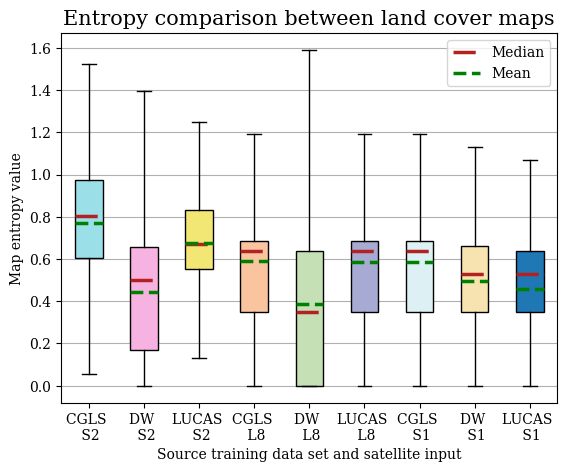

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# define style parameters
# change font
plt.rcParams['font.family'] = 'serif'
fs=15
medianprops = { 'linestyle':'-.',"linewidth":2.5, "color":'firebrick'}
colors = ['#9bdfe8', '#f6b3e2', '#f2e774',"#fac59e","#c4e0b4","#a7aad2","#ddf1f5","#f6e3af"]
# meanpointprops = dict(marker='D', markeredgecolor='black',
#                       markerfacecolor='firebrick')
meanlineprops = {'linestyle':'--', 'linewidth':2.5, "color":'green'}
# create plots
fig, axs = plt.subplots()
bplot = axs.bxp(dictio,medianprops=medianprops,meanprops=meanlineprops,showmeans=True, meanline=True,patch_artist=True)
axs.set_title('Entropy comparison between land cover maps', fontsize=fs)

# add the colours to the boxes
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
# set the labels and grid lines
axs.set_ylabel("Map entropy value")
axs.yaxis.grid(True)
axs.set_xlabel("Source training data set and satellite input")

# add a legend
plt.legend([bplot['medians'][0], bplot['means'][0]], ['Median', 'Mean'])
plt.savefig('2_out_entropy/mapEntropyComparisonsSats.jpg', dpi=300,bbox_inches='tight')
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# #plt.rcParams["figure.figsize"] = (35,3)
plt.show()

show()

options for image_stats_by_zone
MEAN, MAXIMUM, MINIMUM, MODE, STD, MIN_MAX, SUM, VARIANCE

In [14]:
# this would actually be neat for the image with the spatial consistencies
stats = geemap.image_stats_by_zone(GLCent,Spatcon,reducer="S",scale=30)
stats

zone      stat
0     0  0.268288
1     1  0.236694
2     2  0.215698

In [40]:
def entDistributionFromCon(mean,std,label):
    q1 = mean + std*-0.6745
    if q1 < 0:
        q1 = 0
    q3 = mean + std*0.6745
    whislo = q1 - 1.5*(q3-q1)
    if whislo < 0:
        whislo = 0
    whishi = q3 + 1.5*(q3-q1)
    boxes = [
    {
        'label' : label,
        'whislo': whislo,    # Bottom whisker position
        'q1'    : q1,    # First quartile (25th percentile)
        'q3'    : q3,    # Third quartile (75th percentile)
        'whishi': whishi,
        'mean': mean,
        'med':mean,
        'fliers': []        # Outliers
    }]
    return boxes

In [41]:
ent1 = entDistributionFromCon(0.79,0.51,"Not consistent")
ent2 = entDistributionFromCon(0.75,0.48,"Moderately consistent")
ent3 = entDistributionFromCon(0.63,0.46,"Consistent")

In [42]:
dictio = [ent1[0],ent2[0],ent3[0]]
dictio

[{'label': 'Not consistent',
  'whislo': 0,
  'q1': 0.44600500000000004,
  'q3': 1.133995,
  'whishi': 2.1659800000000002,
  'mean': 0.79,
  'med': 0.79,
  'fliers': []},
 {'label': 'Moderately consistent',
  'whislo': 0,
  'q1': 0.42624,
  'q3': 1.07376,
  'whishi': 2.04504,
  'mean': 0.75,
  'med': 0.75,
  'fliers': []},
 {'label': 'Consistent',
  'whislo': 0,
  'q1': 0.31973,
  'q3': 0.9402699999999999,
  'whishi': 1.8710799999999996,
  'mean': 0.63,
  'med': 0.63,
  'fliers': []}]